# Identificación en patrones de ventas de videojuegos   

## Contenido
1. [Descripción del proyecto](#proy)

    1.1 [Descripción de los datos](#datos)
2. [Preparación de los datos](#preparacion)

    2.1 [Cambiar encabezados](#encabezados)

    2.2 [Explorar valores ausentes (NaN)](#nan)

    2.3 [Explorar datos duplicados](#duplicados)

    2.4 [Explorar valores atípicos](#outliers)
3. [Análisis global de los datos ](#analisis-glob)

    3.1 [Juegos lanzados por año](#año)

    3.2 [Juegos mas populares](#game)

    3.3 [Reseñas de los juegos](#reseñas)

    3.4 [Juegos por genero](#genero)

    3.5 [Conclusiones globales](#glob)

4. [Análisis por región de los datos ](#analisis-reg)

    4.1 [Plataformas mas populares](#plat-reg)

    4.2 [Correlación crítica](#corr-reg)

    4.3 [Conclusiones regionales](#glob)

5. [Prueba de hipótesis nula](#hip)

6. [Conclusión](#fin)

## 1.Descripción del proyecto 
<a id="proy"></a>

Identificar patrones que determinen si un videojuego tiene éxito o no utilizando datos 2016 para planear una campaña de ventas para el 2017

### 1.1 Descripción de los datos 

<a id="datos"></a>

1. Ruta de archivo:**/datasets/games.csv** 
2. Es posible que los datos de 2016 estén incompletos. 
3. Las caracteristicas de los datos son:

* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género) 
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 
* EU_sales (ventas en Europa en millones de dólares estadounidenses) 
* JP_sales (ventas en Japón en millones de dólares estadounidenses) 
* Other_sales (ventas en otros países en millones de dólares estadounidenses) 
* Critic_Score (máximo de 100) 
* User_Score (máximo de 10) 
* Rating (ESRB)

4. La columna "rating" almacena la clasificación ESRB de cada juego. Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## 2. Preparación de los datos 

<a id="preparacion"></a>

In [1]:
# Importar bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import zscore

In [2]:
# Carga el archivo de datos
df = pd.read_csv('datasets/games.csv')

In [3]:
# mostrar información del DataFrame
display(df.head(10))
print()
print(df.info())
print()
print(df.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.

<a id="encabezados"></a>

### 2.1 Cambiar encabezados 

In [4]:
def encabezados(df):
    '''
    Renombrar columnas: Bucle en los encabezados para :
    1. Poner todo en minúsculas
    2. Eliminar los espacios
    3. Remplazar espacio entre palabras por "_"
    '''

    new_col_names = []

    for name in df.columns:
        # Luego, pon todas las letras en minúsculas
        name_lowered = name.lower()
        # Elimina los espacios al principio y al final
        name_stripped = name_lowered.strip()
        # Por último, reemplaza los espacios entre palabras por guiones bajos
        name_no_spaces = name_stripped.replace(' ', '_')
        # Convertir todo a string
        name_string = str(name_no_spaces)
        # Agrega el nuevo nombre a la lista de nuevos nombres de columna
        new_col_names.append(name_string)
    # Reemplaza los nombres anteriores por los nuevos
    df.columns = new_col_names
   
encabezados(df)

<a id="nan"></a>

### 2.2 Explorar valores ausentes (NaN)

In [5]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
df[df['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df = df.dropna(subset=['name','genre'])

<div class="alert alert-block alert-info">
<b>
Los renglos de name y gener con NaN no tienen casi nada de información, por lo que podemos eliminarlos
</div>

In [9]:

import re

def extract_year(name, original_year):
    if not isinstance(name, str):
        return original_year
    match = re.search(r'\b(19[0-9]{2}|20[0-1][0-9]|2020)\b', name)
    if match:
        return int(match.group(1))
    return original_year

df['year_of_release'] = df.apply(lambda row: extract_year(row['name'], row['year_of_release']), axis=1)

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información recaba mediante una investigación. Es muy común que cuando trabajamos con datos en la vida real, mucho de estos vengan con valores nulos que en ocasiones tendremos que completar con proxys
</div>

In [10]:
df.isnull().sum()# solo recupero 17!!!!!

name                  0
platform              0
year_of_release     252
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [11]:
df[df['year_of_release'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
df['year_of_release'] = df['year_of_release'].fillna('unknow')

<div class="alert alert-block alert-info">
<b>
Al extraer el año de la columna **name** y colocarlo en **year_of_release** solo se recuperan 17 entradas, por lo que los demás NaN se sustituyen con **unknown**
</div>

In [13]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [14]:
# TBD: a determinar (2424 rows)

df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [15]:
df['critic_score'] = df['critic_score'].fillna('unknow')
df['user_score'] = df['user_score'].fillna('unknow')
df['rating'] = df['rating'].fillna('unknow')
df = df.reset_index(drop=True)

<div class="alert alert-block alert-info">
<b>
Todos los demás NaN se sustituyen con **unknown**
</div>

<a id="duplicados"></a>

### 2.3 Explorar valores duplicados

In [16]:
df.duplicated().sum()


0

<div class="alert alert-block alert-info">
<b>
No hay valores duplicados
</div>

<a id="outliers"></a>

### 2.4 Explorar valores atípicos

In [17]:
df.describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343
std,0.813565,0.503359,0.308871,0.186742
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


In [18]:
print('Dif max y mean na_sales:',round(df['na_sales'].max()-df['na_sales'].median(),2))
print('Dif max y mean eu_sales:',round(df['eu_sales'].max()-df['eu_sales'].median(),2))
print('Dif max y mean jp_sales:',round(df['jp_sales'].max()-df['jp_sales'].median(),2))
print('Dif max y mean other_sales:',round(df['other_sales'].max()-df['other_sales'].median(),2))

Dif max y mean na_sales: 41.28
Dif max y mean eu_sales: 28.94
Dif max y mean jp_sales: 10.22
Dif max y mean other_sales: 10.56


<div class="alert alert-block alert-info">
<b>
La diferencia entre el valor máximo y la mediana sugieren que pueden haber outliers en el dataset. Mas pa na_sales y menos para other_sales

</div>

na_sales          Axes(0.125,0.712609;0.168478x0.167391)
eu_sales       Axes(0.327174,0.712609;0.168478x0.167391)
jp_sales       Axes(0.529348,0.712609;0.168478x0.167391)
other_sales    Axes(0.731522,0.712609;0.168478x0.167391)
dtype: object

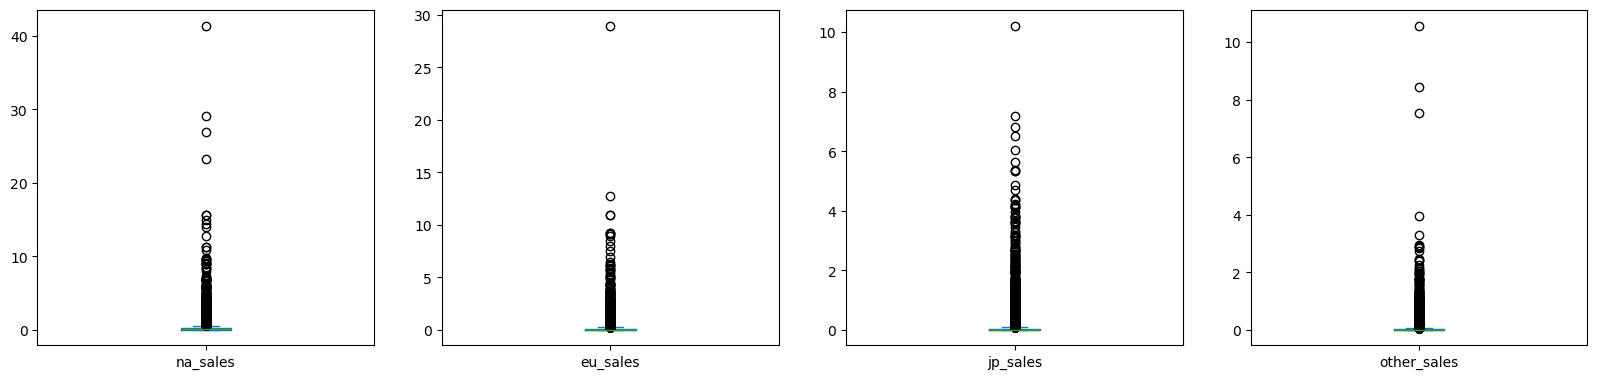

In [19]:
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (4,4))


In [20]:
z_scores_na = np.abs(zscore(df['na_sales']))
outliers_na = df[z_scores_na > 3] #3sigmas
print(f'Outliers na_sales : {round(100*len(outliers_na)/len(df['na_sales']),2)}','%')

z_scores_eu = np.abs(zscore(df['eu_sales']))
outliers_eu = df[z_scores_eu > 3] #3sigmas
print(f'Outliers eu_sales : {round(100*len(outliers_eu)/len(df['eu_sales']),2)}','%')

z_scores_jp = np.abs(zscore(df['jp_sales']))
outliers_jp = df[z_scores_jp > 3] #3sigmas
print(f'Outliers jp_sales : {round(100*len(outliers_jp)/len(df['jp_sales']),2)}','%')

z_scores_other = np.abs(zscore(df['other_sales']))
outliers_other = df[z_scores_other > 3] #3sigmas

print(f'Outliers other_sales : {round(100*len(outliers_other)/len(df['other_sales']),2)}','%')


Outliers na_sales : 1.09 %
Outliers eu_sales : 1.3 %
Outliers jp_sales : 1.43 %
Outliers other_sales : 1.08 %


<div class="alert alert-block alert-info">
<b>

### Valores atípicos
      Los valores atípicos mayores a  3 sigmas corresponden a aproximadamente el 1% de la muestra, por lo que podemos eliminarlos
</b> <a class="tocSkip"></a>
</div>

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,unknow,unknow,unknow
16709,LMA Manager 2007,X360,2007.0,Sports,0.00,0.01,0.00,0.0,unknow,unknow,unknow
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,unknow,unknow,unknow
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,unknow,unknow,unknow
16712,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,unknow,unknow,unknow


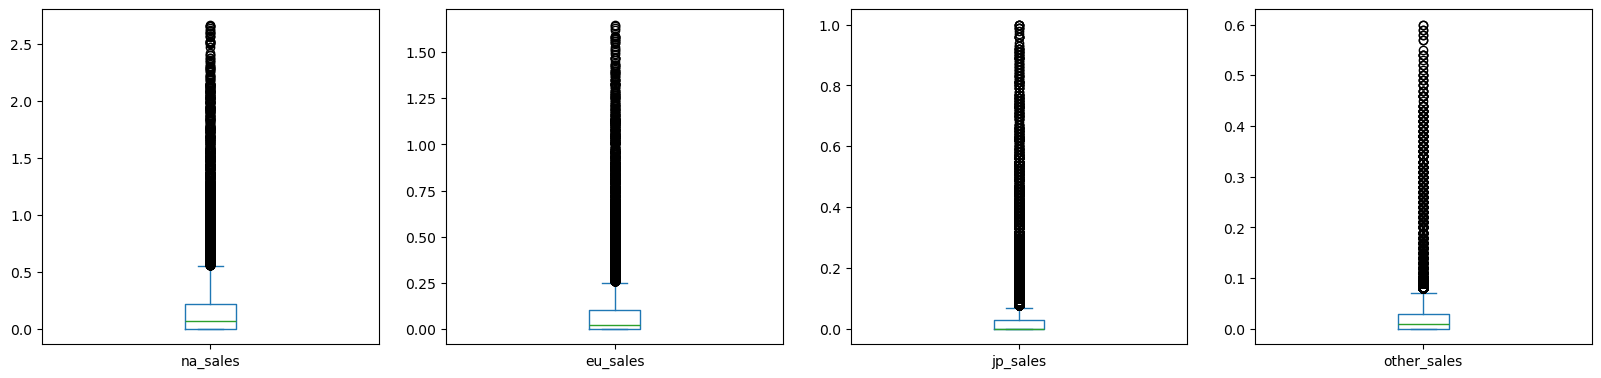

In [21]:
df = df[(np.abs(zscore(df['na_sales']))< 3) & (np.abs(zscore(df['eu_sales']))< 3) & (np.abs(zscore(df['jp_sales']))< 3) & (np.abs(zscore(df['other_sales']))< 3)]
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (4,4))
df.tail()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000
mean,0.193914,0.098863,0.047063,0.031354,0.371194
std,0.335039,0.197469,0.119925,0.062265,0.558769
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.070000,0.020000,0.000000,0.010000,0.160000
75%,0.220000,0.100000,0.030000,0.030000,0.430000
max,2.670000,1.650000,1.000000,0.600000,5.480000


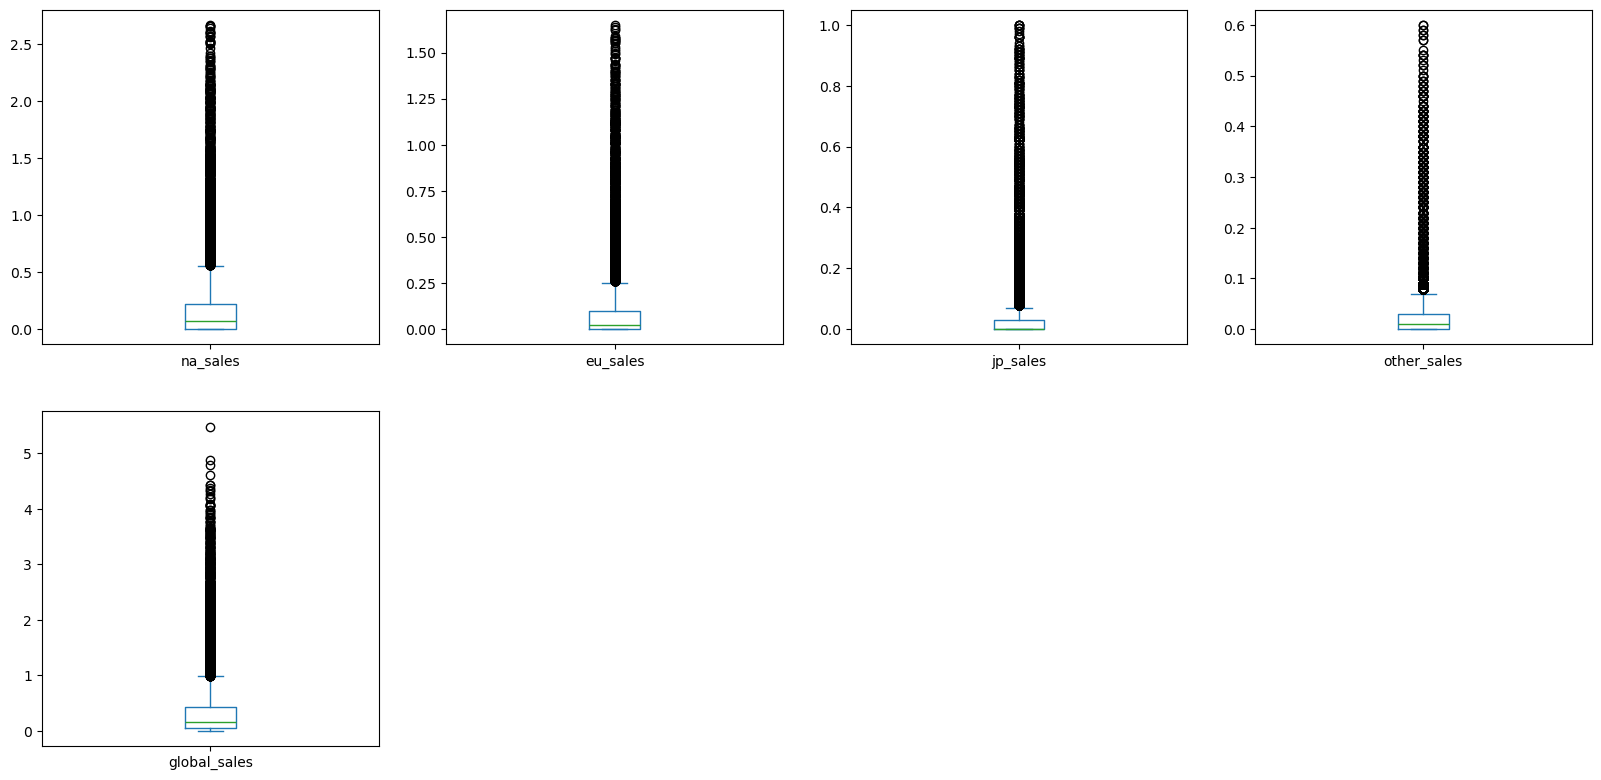

In [22]:
df.loc[:,'global_sales'] = df['na_sales']+ df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (4,4))
df.describe()

<a id="analisis-glob"></a>

## 3. Análisis global de los datos

<a id='año'></a>

### 3.1 Juegos lanzados por año

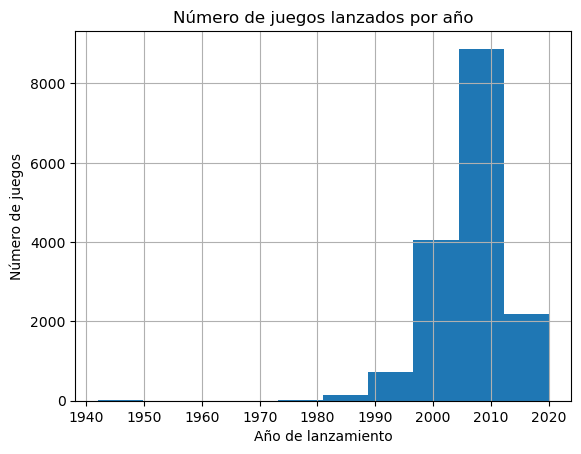

In [23]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
games_by_year = df[['name', 'year_of_release']]
games_by_year_sorted = games_by_year.sort_values(by='year_of_release')
games_by_year_sorted.hist()
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.title('Número de juegos lanzados por año')
plt.show()


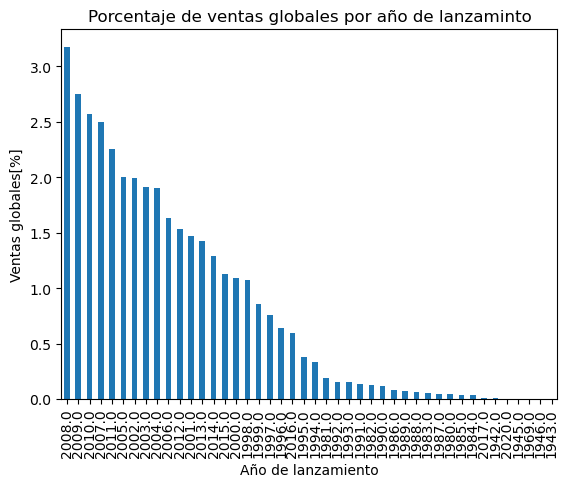

In [24]:
year_count = df.groupby('year_of_release')['global_sales'].sum().sort_values(ascending=False)
porcent_year_count = 100* year_count/ df.shape[0]
porcent_year_count.plot(kind='bar')
plt.title('Porcentaje de ventas globales por año de lanzaminto')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales[%]')
plt.show()

In [25]:
top_5_year = porcent_year_count.nlargest(5)
print(round(top_5_year,2))


year_of_release
2008.0    3.17
2009.0    2.75
2010.0    2.57
2007.0    2.50
2011.0    2.26
Name: global_sales, dtype: float64


<div class="alert alert-block alert-info">
<b>

### Años de lanzamiento con mas ventas globales

        año        ventas globales (%) 

        2008           3.17
        2009           2.75
        2010           2.57
        2007           2.50
        2011           2.26
</b> <a class="tocSkip"></a>
</div>

<a id='game'></a>

### 3.2 Juegos mas populares

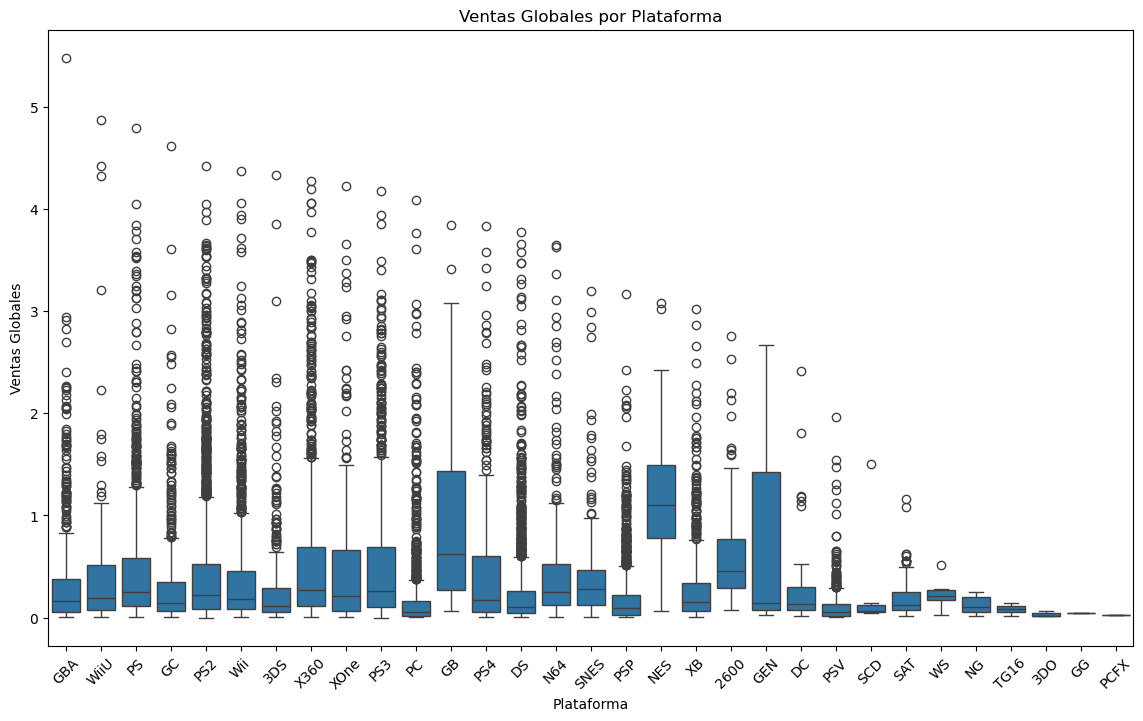

In [26]:
# Crear el diagrama de caja
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='global_sales', data=df)
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

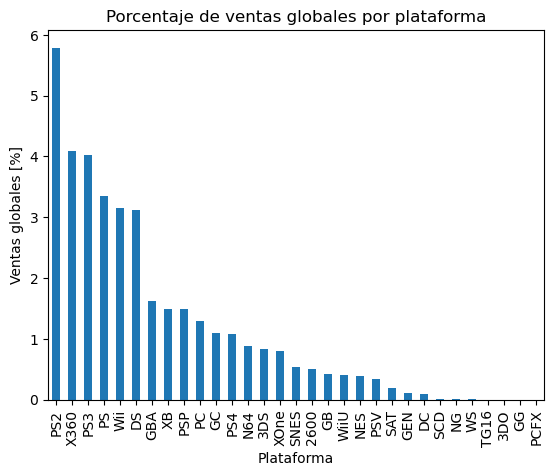

In [27]:
plataform_count = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
porcent_plataform_count = 100* plataform_count/ df.shape[0]
porcent_plataform_count.plot(kind='bar')
plt.title('Porcentaje de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales [%]')
plt.show()
plt.show()

<div class="alert alert-block alert-info">
<b>

### Plataformas con mas ventas globales

        plataformas        ventas globales (%) 

        PS2                    5.79
        X360                   4.09
        PS3                    4.02
        PS                     3.34
        Wii                    3.15
</b> <a class="tocSkip"></a>
</div>

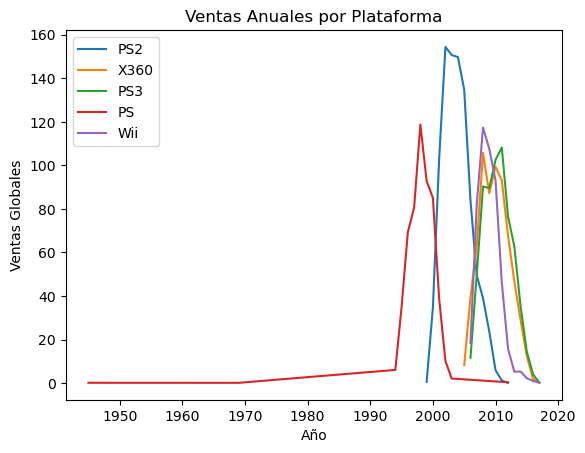

In [28]:
ventas_por_plataforma = df.groupby('platform')['global_sales'].sum()
top_plataformas = ventas_por_plataforma.sort_values(ascending=False).head(5)
for plataforma in top_plataformas.index:
    datos_plataforma = df[df['platform'] == plataforma]
    ventas_anuales = datos_plataforma.groupby('year_of_release')['global_sales'].sum()
    ventas_anuales.plot(kind='line', label=plataforma)

plt.title('Ventas Anuales por Plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.legend()
plt.show()

In [29]:
# Año maximo
año_mas_reciente = df['year_of_release'].max()

# Ventas globales año maximo
ventas_recientes = df[df['year_of_release'] == año_mas_reciente].groupby('platform')['global_sales'].sum()

# Ventas globales de años anteriores
ventas_pasadas = df[df['year_of_release'] < año_mas_reciente].groupby('platform')['global_sales'].sum()
plataformas_populares_pasadas = ventas_pasadas[ventas_pasadas > 0].index

# 4. Comparar max y anteriores
plataformas_sin_ventas_recientes = [plataforma for plataforma in plataformas_populares_pasadas if plataforma not in ventas_recientes or ventas_recientes[plataforma] == 0]

print("Plataformas que eran populares pero ahora no tienen ventas:"), 
print(plataformas_sin_ventas_recientes)

Plataformas que eran populares pero ahora no tienen ventas:
['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


/tmp/ipykernel_38424/2096771713.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  años_por_plataforma = df.groupby('platform')['year_of_release'].agg([min, max])
/tmp/ipykernel_38424/2096771713.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  años_por_plataforma = df.groupby('platform')['year_of_release'].agg([min, max])


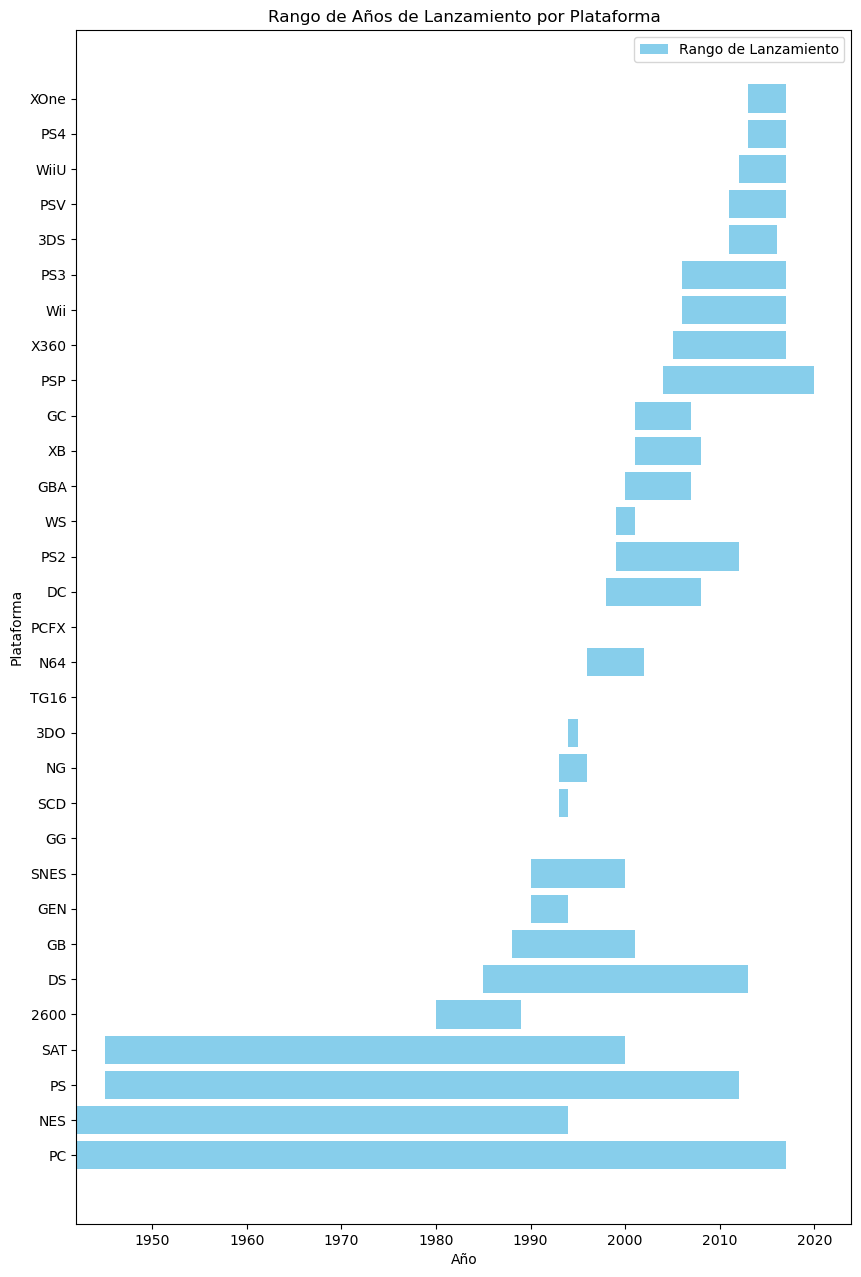

In [30]:

años_por_plataforma = df.groupby('platform')['year_of_release'].agg([min, max])
años_por_plataforma.columns = ['Año de Lanzamiento Mínimo', 'Año de Lanzamiento Máximo']
años_por_plataforma.sort_values('Año de Lanzamiento Mínimo', inplace=True)
plt.figure(figsize=(10, len(años_por_plataforma) / 2))
plt.barh(años_por_plataforma.index, años_por_plataforma['Año de Lanzamiento Máximo'] - años_por_plataforma['Año de Lanzamiento Mínimo'], left=años_por_plataforma['Año de Lanzamiento Mínimo'], color='skyblue', label='Rango de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.title('Rango de Años de Lanzamiento por Plataforma')
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>

### Plataformas y años

Las plataformas mas rentables son: 

PS2, X360, PS3, Ps, Wii

entre los años 2007 -2011


</b> <a class="tocSkip"></a>
</div>

<a id='reseñas'></a>

### 3.3 Reseñas de los juegos

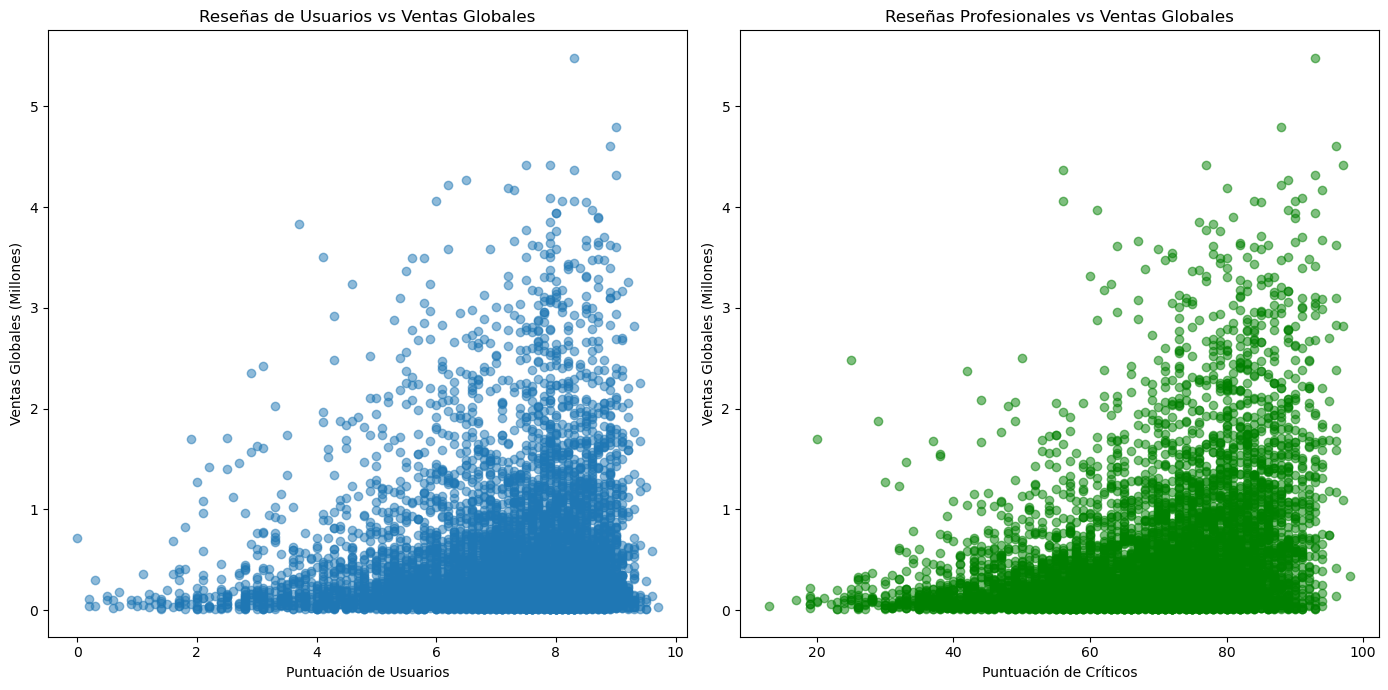

In [31]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['global_sales'] = pd.to_numeric(df['global_sales'], errors='coerce')

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1) 
plt.scatter(df['user_score'], df['global_sales'], alpha=0.5)
plt.title('Reseñas de Usuarios vs Ventas Globales')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Globales (Millones)')
plt.subplot(1, 2, 2)  
plt.scatter(df['critic_score'], df['global_sales'], alpha=0.5, color='green')
plt.title('Reseñas Profesionales vs Ventas Globales')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Globales (Millones)')
plt.tight_layout()  
plt.show()

In [32]:
correlation_user = df['user_score'].corr(df['global_sales'])
correlation_professional = df['critic_score'].corr(df['global_sales'])

print(f"Correlación entre reseñas de usuarios y ventas: {correlation_user}")
print(f"Correlación entre reseñas profesionales y ventas: {correlation_professional}")

Correlación entre reseñas de usuarios y ventas: 0.13540358894267723
Correlación entre reseñas profesionales y ventas: 0.3376802040455317


<div class="alert alert-block alert-info">
<b>

### La correlación entre las ventas globales y las reseñas es muy baja


</b> <a class="tocSkip"></a>
</div>

<a id='reseñas'></a>

### 3.4 Juegos por género


In [33]:
ventas_por_juego_y_genero = df.groupby(['name', 'genre'])['global_sales'].sum().reset_index()
ventas_ordenadas = ventas_por_juego_y_genero.sort_values(by='global_sales', ascending=False)
print(ventas_ordenadas)

                                                  name    genre  global_sales
731                                      Battlefield 4  Shooter         13.94
5013                        LEGO Batman: The Videogame   Action         13.40
5024       LEGO Indiana Jones: The Original Adventures   Action         10.53
5030                          LEGO Marvel Super Heroes   Action          9.41
6575                       Need for Speed: Most Wanted   Racing          9.40
...                                                ...      ...           ...
6849     Original Frisbee Disc Sports: Ultimate & Golf   Action          0.01
2356          Doraemon Wii: Himitsu Douguou Ketteisen!     Misc          0.01
4817  Kikiite Hajimaru: Eigo Kaiwa Training - KikiTore     Misc          0.01
8783            Space Channel 5: Ulala's Cosmic Attack     Misc          0.01
3365                                  G1 Jockey 4 2008   Sports          0.00

[11295 rows x 3 columns]


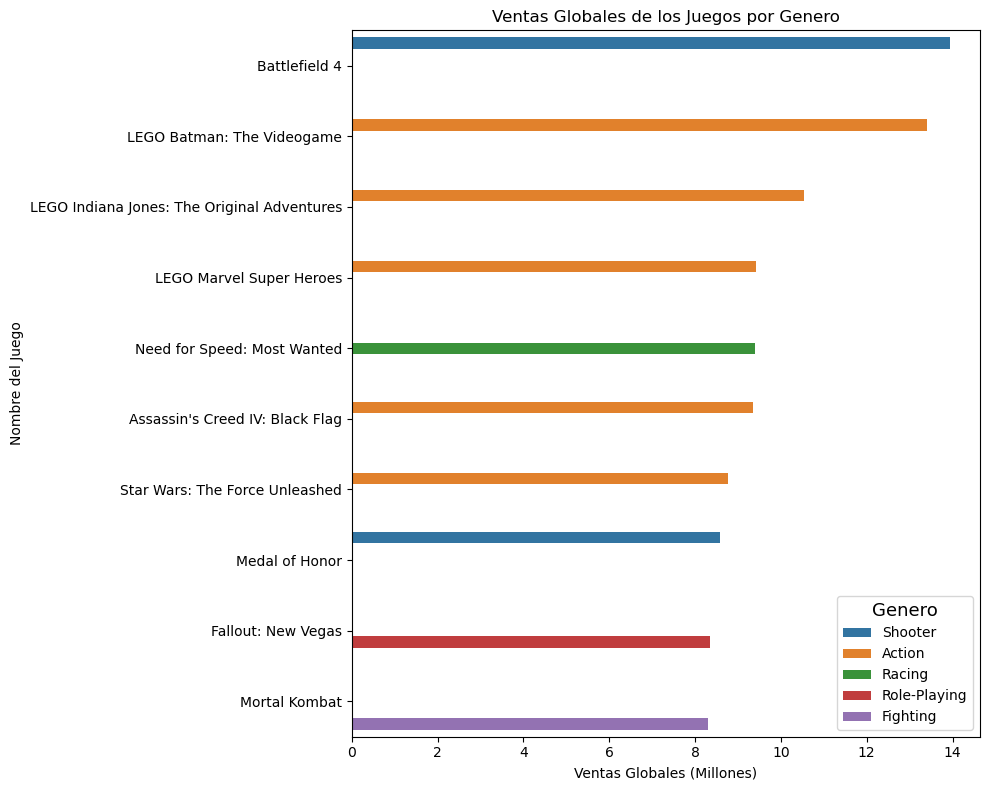

In [34]:
top_juegos = ventas_ordenadas.head(10)  
plt.figure(figsize=(10, 8))
sns.barplot(x='global_sales', y='name', hue='genre', data=top_juegos, dodge=True)
plt.title('Ventas Globales de los Juegos por Genero')
plt.xlabel('Ventas Globales (Millones)')
plt.ylabel('Nombre del Juego')
plt.legend(title='Genero', title_fontsize='13', fontsize='10', loc='lower right')
plt.tight_layout()

plt.show()

In [35]:
genre_count = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
porcent_genre_count = 100* genre_count/ df.shape[0]
top_5_genre = porcent_genre_count.nlargest(5)
print(round(top_5_genre,2))

genre
Action          7.94
Sports          5.78
Shooter         3.96
Misc            3.49
Role-Playing    3.06
Name: global_sales, dtype: float64


<div class="alert alert-block alert-info">
<b>

### Generos con mas ventas globales

        genero             ventas globales (%) 

        Action                    7.94
        Sports                    5.78
        Shooter                   3.96
        Misc                      3.49
        Role-Playing              3.06
</b> <a class="tocSkip"></a>
</div>

<a id='glob'></a>

### 3.4 Conclusiones globales


<div class="alert alert-block alert-info">
<b>

### Ventas globales: 5 Videojuegos con mas ventas globales por:
        
        plataformas        año            genero                  
        PS2   5.79%       2008  3.17%    Action         7.94%    
        X360  4.09%       2009  2.75%    Sports         5.78%    
        PS3   4.02%       2010  2.57%    Shooter        3.96%    
        PS    3.34%       2007  2.50%    Misc           3.49%    
        Wii   3.15%       2011  2.26%    Role-Playing   3.06%    
</b> <a class="tocSkip"></a>
</div>


<a id="analisis-reg"></a>

## 4. Análisis por región de los datos 

<a id="plat-reg"></a>

### 4.1 Plataformas mas populares por región

In [36]:
top_platforms_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)


In [37]:
top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('Top 5 genero NA',top_genres_na)
print('Top 5 genero EU',top_genres_eu)
print('Top 5 genero JP',top_genres_jp)


Top 5 genero NA genre
Action     674.08
Sports     543.72
Shooter    357.37
Misc       303.87
Racing     265.18
Name: na_sales, dtype: float64
Top 5 genero EU genre
Action     375.08
Sports     224.58
Shooter    197.04
Racing     160.39
Misc       145.27
Name: eu_sales, dtype: float64
Top 5 genero JP genre
Role-Playing    167.01
Action          119.61
Sports           87.72
Misc             68.31
Fighting         62.39
Name: jp_sales, dtype: float64


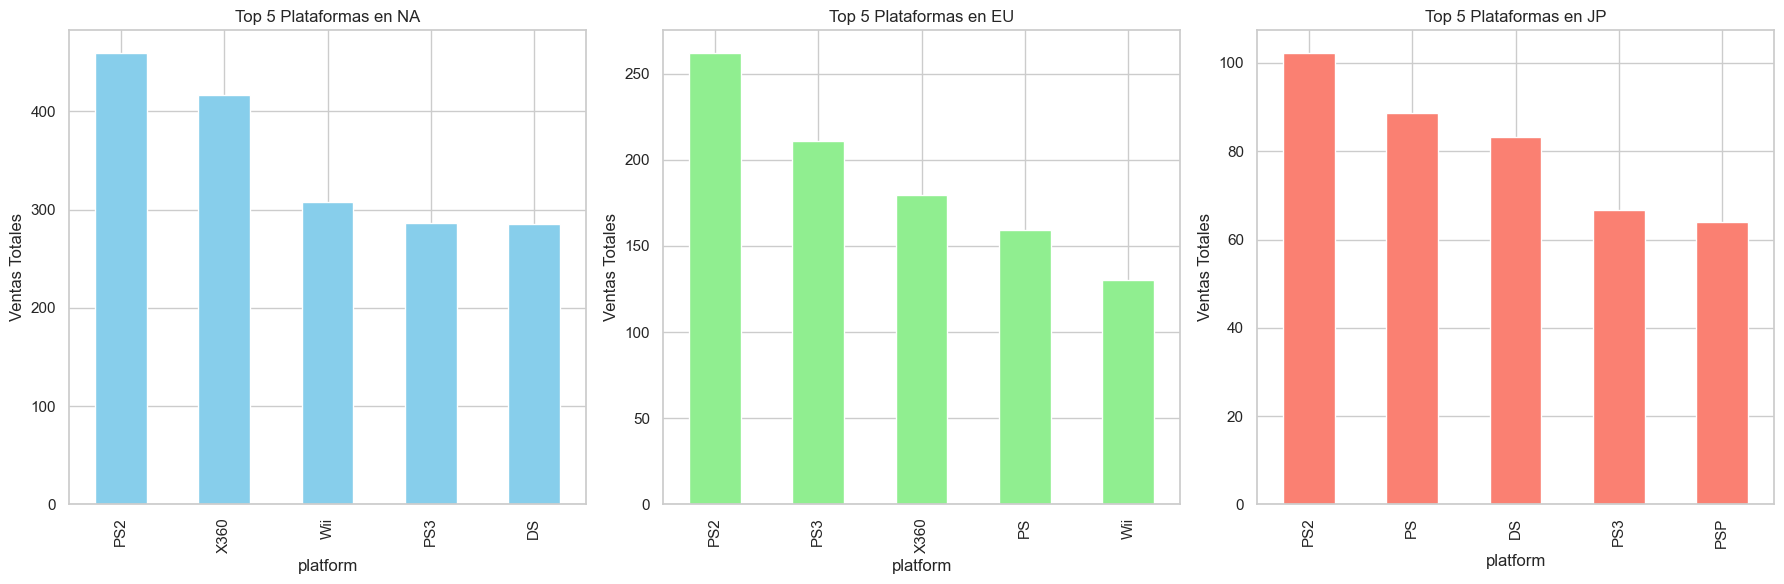

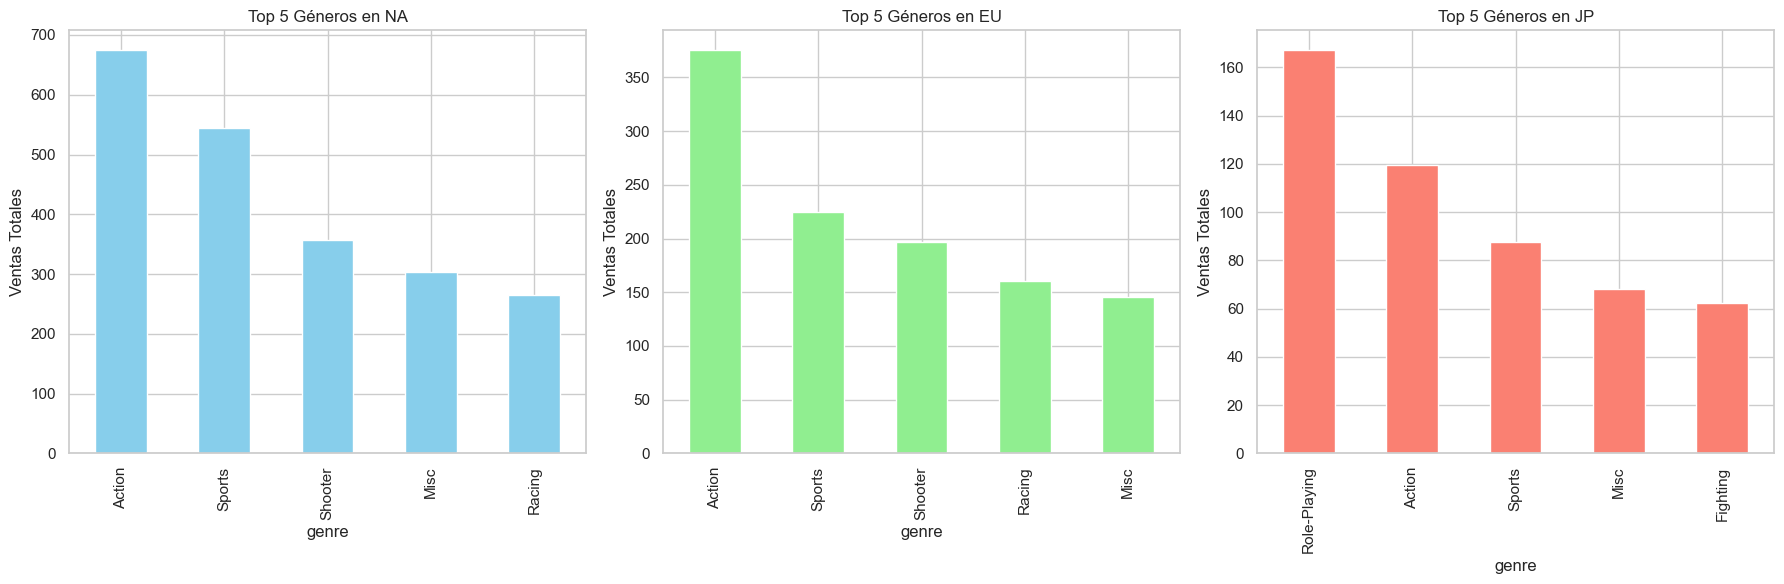

In [38]:
sns.set(style="whitegrid")

# Gráfico de las cinco principales plataformas por región
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
top_platforms_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 Plataformas en NA')
plt.ylabel('Ventas Totales')

plt.subplot(1, 3, 2)
top_platforms_eu.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Plataformas en EU')
plt.ylabel('Ventas Totales')

plt.subplot(1, 3, 3)
top_platforms_jp.plot(kind='bar', color='salmon')
plt.title('Top 5 Plataformas en JP')
plt.ylabel('Ventas Totales')

plt.tight_layout()
plt.show()

# Gráfico de los cinco principales géneros por región
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
top_genres_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 Géneros en NA')
plt.ylabel('Ventas Totales')

plt.subplot(1, 3, 2)
top_genres_eu.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Géneros en EU')
plt.ylabel('Ventas Totales')

plt.subplot(1, 3, 3)
top_genres_jp.plot(kind='bar', color='salmon')
plt.title('Top 5 Géneros en JP')
plt.ylabel('Ventas Totales')

plt.tight_layout()
plt.show()

<a id="corr-reg"></a>

### 4.2 Correlación de las reseñas de usuarios y críticos por con las ventas globales, por región

In [39]:
# Correlación de user_score con ventas por región
correlation_user_na = df['user_score'].corr(df['na_sales'])
correlation_user_eu = df['user_score'].corr(df['eu_sales'])
correlation_user_jp = df['user_score'].corr(df['jp_sales'])


print(f"Correlación entre reseñas de usuarios y ventas en NA: {correlation_user_na}")
print(f"Correlación entre reseñas de usuarios y ventas en EU: {correlation_user_eu}")
print(f"Correlación entre reseñas de usuarios y ventas en JP: {correlation_user_jp}\n")

# Correlación de critic_score con ventas por región
correlation_critic_na = df['critic_score'].corr(df['na_sales'])
correlation_critic_eu = df['critic_score'].corr(df['eu_sales'])
correlation_critic_jp = df['critic_score'].corr(df['jp_sales'])


print(f"Correlación entre reseñas profesionales y ventas en NA: {correlation_critic_na}")
print(f"Correlación entre reseñas profesionales y ventas en EU: {correlation_critic_eu}")
print(f"Correlación entre reseñas profesionales y ventas en JP: {correlation_critic_jp}")

Correlación entre reseñas de usuarios y ventas en NA: 0.11916237413783427
Correlación entre reseñas de usuarios y ventas en EU: 0.0916636962921251
Correlación entre reseñas de usuarios y ventas en JP: 0.15180263487724122

Correlación entre reseñas profesionales y ventas en NA: 0.30611077746017096
Correlación entre reseñas profesionales y ventas en EU: 0.2889777672444126
Correlación entre reseñas profesionales y ventas en JP: 0.14516097324468874


<a id='reg'></a>

### 4.3 Conclusiones por región

<div class="alert alert-block alert-info">
<b>

### 5 Videojuegos con mas ventas  por región

## Norte América
        
        plataformas          genero                  
        PS2                  Action          
        X360                 Sports           
        Wii                  Shooter           
        PS3                  Misc            
        DS                   Racing     

## Europa
        
        plataformas          genero                  
        PS2                  Action          
        PS3                  Sports           
        X360                 Shooter           
        PS                   Racing            
        Wii                  Misc 

## Japón
        
        plataformas          genero                  
        PS2                  Role-Playing          
        PS                   Action           
        DS                   Sport   
        PS3                  Misc            
        PSP                  Fighting 
</b> <a class="tocSkip"></a>
</div>


## 5.Prueba de hipótesis nula 
<a id="hip"></a>

In [40]:
calificaciones_xbox_one = df[df['platform'] == 'Xbox One']['user_score'].dropna()
calificaciones_pc = df[df['platform'] == 'PC']['user_score'].dropna()
calificaciones_xbox_one = calificaciones_xbox_one.dropna()
calificaciones_pc = calificaciones_pc.dropna()

# Verificar que ambas series tengan datos para comparar
if len(calificaciones_xbox_one) > 0 and len(calificaciones_pc) > 0:
    # Realizar el test de t de Student para muestras independientes
    t_statistic, p_value = stats.ttest_ind(calificaciones_xbox_one, calificaciones_pc)

    print(f"Estadístico t: {t_statistic}, Valor p: {p_value}")

    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        print("Rechazar la hipótesis nula: Existe evidencia significativa de que las calificaciones promedio son diferentes.")
    else:
        print("No rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.")
else:
    print("No hay suficientes datos para realizar el test.")

No hay suficientes datos para realizar el test.


In [41]:
calificaciones_accion = df[df['genre'] == 'Action']['user_score'].dropna()
calificaciones_deportes = df[df['genre'] == 'Sports']['user_score'].dropna()

# Verificar que ambas series tengan datos para comparar
if len(calificaciones_accion) > 0 and len(calificaciones_deportes) > 0:
    # Realizar el test de t de Student para muestras independientes
    t_statistic, p_value = stats.ttest_ind(calificaciones_accion, calificaciones_deportes)

    print(f"Estadístico t: {t_statistic}, Valor p: {p_value}")

    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        print("Rechazar la hipótesis nula: Existe evidencia significativa de que las calificaciones promedio de los géneros de Acción y Deportes son diferentes.")
    else:
        print("No rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los géneros de Acción y Deportes son diferentes.")
else:
    print("No hay suficientes datos para realizar el test.")

Estadístico t: 0.989981155646619, Valor p: 0.3222682034988541
No rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los géneros de Acción y Deportes son diferentes.


## 6. Conclusión generales
<a id="fin"></a>

<div class="alert alert-block alert-info">
<b>

### Los datos globales y por región se comprtan de manera muy similiar:

1. Las plataformas mas rentables son: PS2, X360, PS3, Ps, Wii

2. Las mejores ventas están entre los años: 2007 -2011

3. Los generos mas vendidos son: Sport, Shooter, Racing, Role-Playing

4. La correlación entre las ventas globales y las reseñas es muy baja

</b> <a class="tocSkip"></a>
</div>